In [1]:
import numpy as np
import seaborn as sns

# Проверка модели

### Отложенные данные

Отложенные наборы данных (holdout sets) - отложим некоторое подмножество данных из обучающей последовательности модели, после чего используем его для проверки качества работы модели

In [3]:
from sklearn.model_selection import train_test_split
X, y = np.random.randint(0, 100, size=(100, 2)), np.random.randint(0, 2, size=(100,))

In [4]:
# разделяем данные по 50% в каждом наборе
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [6]:
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [7]:
y2_model = model.predict(X2)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y2, y2_model)

0.5

### Перекрестняа проверка модели (cross-validation)

Перекрестная проверка (cross-validation) - выполнение последовательности аппроксимаций, в которых каждое подмножество данных используется как в качестве обучающей последовательности, так и проверочного набора.
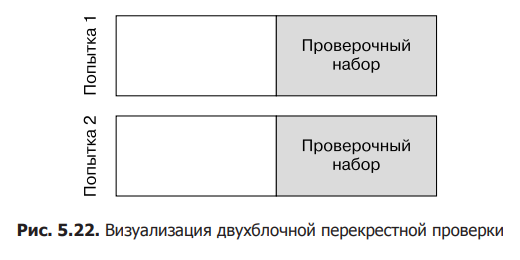
Мы выполняем две попытки проверки, попеременно используя каждую половину данных в качестве отложенного набора данных

In [11]:
# двухблочная перекрестная проверка (two-fold cross-validation)
y1_model = model.fit(X2, y2).predict(X1)
y2_model = model.fit(X1, y1).predict(X2)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.58, 0.5)

Полученные числа — две оценки точности, которые можно обобщить (допустим, взяв от них среднее значение) для получения лучшей меры общей работы
модели

Пятиблочная перекрестная проверка
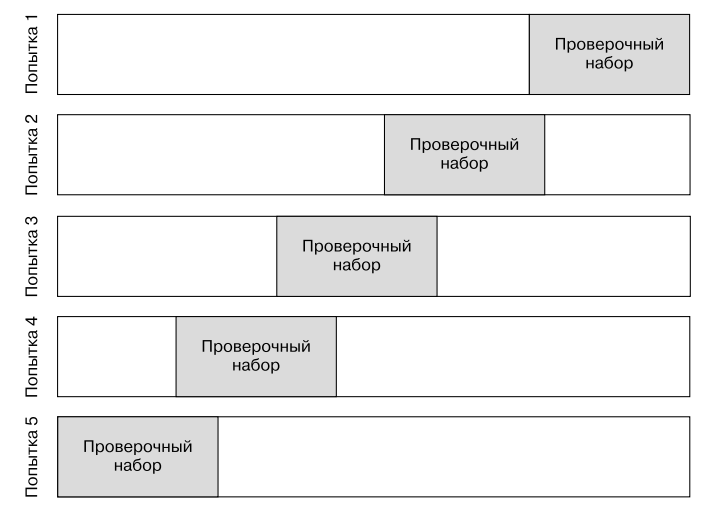

In [12]:
from sklearn.model_selection import cross_val_score
# пятиблочная перекрестная проверка
cross_val_score(model, X, y, cv=5)

array([0.55, 0.65, 0.55, 0.5 , 0.7 ])

###  LeaveOneOut

Обучаем модель в каждой попытке на всех точках, кроме одной. Такой тип перекрестной проверки известен под названием перекрестной проверки по отдельным объектам (leaveone-out cross-validation — дословно «перекрестная проверка по всем без одного»)

In [14]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.])

In [16]:
# Среднее значение этих результатов дает нам общую оценку частоты ошибок
scores.mean()

0.6